#  Calibrer les hyper paramètres d'un classifieur - gridsearch 

Dans cette séance, on se focalise sur les paramètres du classifieur, dans le but d'optimiser les (mesures de) performances. 
1. Mesurer l'impact du paramètre "max_depth" d'un DecisionTreeClassifier sur l'accuracy (sur le problème OCR)
2. Appliquer un gridsearch en se servant de l'exemple ci dessous. 

## Optimisation du paramètre max_depth de DecisionTreeClassifier sans gridsearch

**Exercice 1** : Faites varier le paramètre max_depth et mesurer la performance (accuracy) de la classification (utiliser notre fonction d'accurarcy)

In [40]:
def accuracy(y_pred,y) : 
    return (sum(y_pred == y))/len(y)

0.15
0.20416666666666666
0.2791666666666667
0.3416666666666667
0.39166666666666666
0.4375
0.5791666666666667
0.5625
0.6
0.5958333333333333
0.5708333333333333
0.575
0.6125
0.5791666666666667
0.5291666666666667
0.5916666666666667
0.5791666666666667
0.575
0.5916666666666667
0.5708333333333333
0.5791666666666667
0.6
0.6041666666666666
0.5958333333333333
0.6
0.5625
0.6041666666666666
0.5916666666666667
0.6041666666666666
0.6166666666666667
0.5916666666666667
0.575
0.5958333333333333
0.5791666666666667
0.6208333333333333
0.6125
0.5791666666666667
0.5875
0.5541666666666667
0.5708333333333333
0.6125
0.6083333333333333
0.5875
0.5916666666666667
0.6166666666666667
0.6125
0.5791666666666667
0.6166666666666667
0.5708333333333333


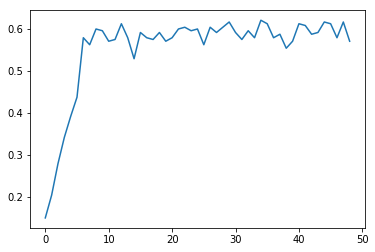

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets
from PIL import Image, ImageFilter 
import numpy as np

valuesList = list()
labelsList = list()

def accuracy(y_pred,y) : 
    return (sum(y_pred == y))/len(y)

def cropGrille(xinit, y, dx, dy, margex, margey, file, show=False):
    x=xinit
    im = Image.open(file)
    #im = im.filter(GaussianBlur(radius=10))
    #im = im[120:220]    
    #plt(im)
    
    for j in range(10):
        x=xinit
        for i in range(10):
            #box = (x, y, x+dx, y+dy)    
            box = (x+margex, y+margey, x+dx-margex, y+dy-margey)
            region = im.crop(box)
                        
            region = region.convert('L')
            tab = np.array(region)
            tab = tab.reshape((region.size[0] * region.size[1]),)
            valuesList.append(tab)
            if( file == "p010.bmp"):
                labelsList.append((j+1)%10)
            else :
                labelsList.append(j)    
            x+=dx  
        y=y+dy 


cropGrille(150, 225, 94, 109, 10, 14, "séance 3/p004.bmp")
cropGrille(149, 225, 94, 109, 10, 14, "séance 3/p006.bmp")
cropGrille(152, 225, 94, 109, 10, 14, "séance 3/p007.bmp")
cropGrille(153, 225, 94, 109, 10, 14, "séance 3/p008.bmp")
cropGrille(152, 225, 94, 109, 10, 14, "séance 3/p009.bmp")
cropGrille(152, 225, 94, 109, 10, 14, "séance 3/p010.bmp")

valuesArray = np.array(valuesList)
labelsArray = np.array(labelsList)

X_train, X_test, y_train, y_test = train_test_split(
    valuesArray, labelsArray, test_size=0.4, random_state=0)

customXTrain = valuesArray[400:600]
customYTrain = labelsArray[400:600]

X_train.shape, y_train.shape

X_test.shape, y_test.shape

plotTab = []

for k in range(1,50) :
    current = []
    clf = DecisionTreeClassifier(max_depth = k)
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    current.append(k)
    #print(k)
    #print(accuracy(valuesArray, y_pred))
    print(clf.score(X_test, y_test))
    #current.append(clf.score(X_test, y_test))
    plotTab.append(clf.score(X_test, y_test))
    
plt.plot(plotTab)

# complétez ici

**Exercice 2** : Produisez un graphique permettant de mesurer visuellement l'effet (de la valeur) du paramètre sur la performance 

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

import random
res = [random.random() for i in range(100)] #cf liste en compréhension en python 

plt.ylim([0,1])
plt.plot(res, label="blabla")
plt.title("Accuracy en fonction de max_depth")
plt.legend()
plt.xlabel("abscisses")
plt.ylabel("ordonnees")
plt.show()

#plt.plot(plotTab)

## Optimisation du paramètre max_depth de DecisionTreeClassifier avec gridsearch

**Exercice 3** : Vérifiez vos résultats avec un gridsearch et un classification_report

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier

In [ ]:
titanic_data = pd.read_csv("http://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv")

In [ ]:
y=titanic_data['Survived']
x=titanic_data.drop('Survived', axis=1)
x=x.drop('Name', axis=1)
x = pd.get_dummies(x, columns=['Sex'])

In [ ]:
from __future__ import print_function

from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
 

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.5, random_state=0)


tuned_parameters =  {'max_depth': np.arange(1, 10)}

#scores = ['precision', 'recall', 'accuracy']
scores = [ 'accuracy']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, cv=5, scoring=score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_estimator_)
    print()
    print("Grid scores on development set:")
    print()
    for params, mean_score, scores in clf.grid_scores_:
        print("%0.3f (+/-%0.03f) for %r"
              % (mean_score, scores.std() / 2, params))
    print()

    print("Detailed classification report:")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

